## Data Description and Exploration

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [31]:
df = pd.read_csv('zameen-updated.csv')
df

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168441,17355248,6754,https://www.zameen.com/Property/gulshan_e_maym...,House,26500000,Gadap Town,Karachi,Sindh,25.029909,67.137192,0,9.6 Marla,For Sale,6,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,9.6,5-10 Marla
168442,17355249,680,https://www.zameen.com/Property/gadap_town_gul...,House,12500000,Gadap Town,Karachi,Sindh,25.017951,67.136393,0,8 Marla,For Sale,3,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,8.0,5-10 Marla
168443,17355250,6757,https://www.zameen.com/Property/gulshan_e_maym...,House,27000000,Gadap Town,Karachi,Sindh,25.015384,67.116330,0,9.6 Marla,For Sale,6,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,9.6,5-10 Marla
168444,17355251,6752,https://www.zameen.com/Property/gulshan_e_maym...,House,11000000,Gadap Town,Karachi,Sindh,25.013265,67.120818,0,7.8 Marla,For Sale,3,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,7.8,5-10 Marla


In [32]:
# make 5 batches by time with equal number of rows
df['date_added'] = pd.to_datetime(df['date_added'])
df['time'] = (df['date_added'] - pd.Timestamp('2019-04-02')).dt.total_seconds()
df['batch'] = pd.qcut(df['time'], 5, labels=False)
df = df.drop(['time'], axis=1)
df = df[df['batch'] == 0]
df = df.drop(['batch'], axis=1)
df

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,2019-02-04,NaN,NaN,Marla,4.0,0-5 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,2019-04-05,NaN,NaN,Kanal,2.0,1-5 Kanal
5,850762,3390,https://www.zameen.com/Property/ghauri_town_gh...,House,34500000,Ghauri Town,Islamabad,Islamabad Capital,33.623947,73.126588,8,1.6 Kanal,For Sale,8,2019-04-05,NaN,NaN,Kanal,1.6,1-5 Kanal
6,937975,445,https://www.zameen.com/Property/islamabad_kora...,House,27000000,Korang Town,Islamabad,Islamabad Capital,33.579034,73.139591,8,1 Kanal,For Sale,8,2019-01-04,NaN,NaN,Kanal,1.0,1-5 Kanal
8,1402466,376,https://www.zameen.com/Property/dha_defence_dh...,House,50000000,DHA Defence,Islamabad,Islamabad Capital,33.540894,73.095732,7,1 Kanal,For Sale,7,2018-10-19,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Kanal,1.0,1-5 Kanal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59919,15825668,6699,https://www.zameen.com/Property/federal_b_area...,House,19000000,Federal B Area,Karachi,Sindh,24.929408,67.080710,4,4.8 Marla,For Sale,4,2019-04-09,M N B Associates,MNasir,Marla,4.8,0-5 Marla
59963,15826411,9700,https://www.zameen.com/Property/karachi_falakn...,Flat,6000000,Falaknaz Presidency,Karachi,Sindh,24.927051,67.173994,0,3.8 Marla,For Sale,0,2019-04-09,Bahria Al-Falah Estate & Builders,Tariq,Marla,3.8,0-5 Marla
59970,15827169,1483,https://www.zameen.com/Property/d_h_a_dha_phas...,Flat,9500000,DHA Defence,Karachi,Sindh,24.805045,67.064323,2,4.2 Marla,For Sale,2,2019-04-09,Pary Enterprises,Ali Jamal,Marla,4.2,0-5 Marla
59973,15827440,6844,https://www.zameen.com/Property/gulistan_e_jau...,Flat,3500000,Gulistan-e-Jauhar,Karachi,Sindh,24.907871,67.115263,0,6 Marla,For Sale,0,2019-04-09,Ali Real Estate,Faizi,Marla,6.0,5-10 Marla


### What data features need to be cleaned

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34202 entries, 0 to 59975
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   property_id    34202 non-null  int64         
 1   location_id    34202 non-null  int64         
 2   page_url       34202 non-null  object        
 3   property_type  34202 non-null  object        
 4   price          34202 non-null  int64         
 5   location       34202 non-null  object        
 6   city           34202 non-null  object        
 7   province_name  34202 non-null  object        
 8   latitude       34202 non-null  float64       
 9   longitude      34202 non-null  float64       
 10  baths          34202 non-null  int64         
 11  area           34202 non-null  object        
 12  purpose        34202 non-null  object        
 13  bedrooms       34202 non-null  int64         
 14  date_added     34202 non-null  datetime64[ns]
 15  agency         11495 non

In [34]:
df.describe()

,property_id,location_id,price,latitude,longitude,baths,bedrooms,date_added,Area Size
count,3.420200e+04,34202.000000,3.420200e+04,34202.000000,34202.000000,34202.000000,34202.000000,34202,34202.000000
mean,1.379418e+07,4362.517835,1.712434e+07,29.940254,71.236693,3.022601,3.199228,2019-01-10 20:46:57.519443456,5.809651
min,1.289830e+05,1.000000,1.000000e+00,24.749425,31.389173,0.000000,0.000000,2018-08-05 00:00:00,0.100000
25%,1.280976e+07,766.000000,1.250000e+05,24.934623,67.116630,2.000000,2.000000,2018-11-19 00:00:00,3.100000
50%,1.408490e+07,3286.000000,7.500000e+06,31.465275,73.061435,3.000000,3.000000,2019-02-03 00:00:00,5.000000
75%,1.498971e+07,7210.000000,1.750000e+07,33.564427,73.174596,4.000000,4.000000,2019-03-18 00:00:00,8.000000
max,1.582777e+07,13769.000000,1.450000e+09,33.812891,74.501450,10.000000,15.000000,2019-04-09 00:00:00,500.000000
std,1.549990e+06,3765.763824,3.692857e+07,3.822906,3.109260,2.185350,2.075999,NaN,4.798716


In [35]:
df.nunique()

property_id      34202
location_id       3225
page_url         34202
property_type        7
price             1059
location          1272
city                 5
province_name        3
latitude          4424
longitude         4774
baths               11
area               269
purpose              2
bedrooms            15
date_added          71
agency            2007
agent             2793
Area Type            2
Area Size          208
Area Category       18
dtype: int64

<Axes: ylabel='Frequency'>

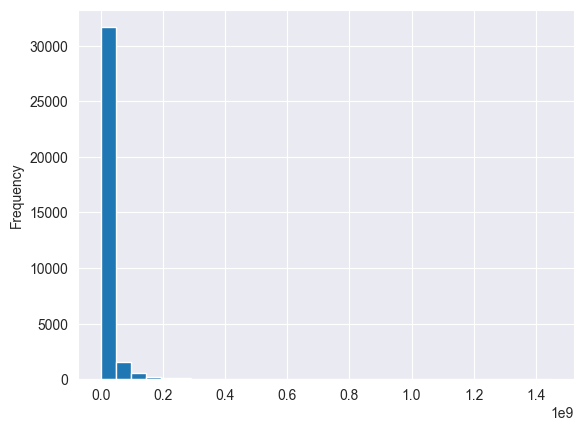

In [36]:
df['price'].plot.hist(bins=30)

As we see the following features need to be cleaned:
- There are outliers in the price column which need to be removed;
- There are outliers in coordinates. Since zameen.com is a site with Pakistan property, we can remove the coordinates that are not in Pakistan;
- property_id and page_url are not useful for our analysis;
- Kanal areas should be converted to Marla (because there are linear relationships between them);
- Missing values in 'agency' and 'agent' are logical, because not all properties are sold by agencies or agents, so we can fill them with '-'.

### Data Cleaning

American Institute of Pakistan Studies says "Pakistan lies between 23 degrees 35 minutes to 37 degrees 05 minutes North latitude and 60 degrees 50 minutes to 77 degrees 50 minutes east longitude." (https://www.pakistanstudies-aips.org/pakistan/geography#:~:text=Pakistan%20lies%20between%2023%20degrees%2035%20minutes%20to%2037%20degrees%2005%20minutes%20North%20latitude%20and%2060%20degrees%2050%20minutes%20to%2077%20degrees%2050%20minutes%20east%20longitude)
Let's cut off data with this coordinates taking some margin just in case - latitude from 22 to 38, longitude from 59 to 79

In [37]:
# Dropping outliers in 'price' column
df = df[(df['price'] < 0.2 * 10**9) & (df['price'] > 5000)]

# Filtering data based on latitude and longitude
df = df[(df['latitude'] > 22) & (df['latitude'] < 38) &
        (df['longitude'] > 59) & (df['longitude'] < 79)]

# Dropping unnecessary columns
df = df.drop(['property_id', 'page_url'], axis=1)

# Converting 'Area Type' and 'Area Size' to a single 'area' column in Marla
df['area'] = np.where(df['Area Type'] == 'Kanal', df['Area Size'] * 20, df['Area Size'])
df['area'] = df['area'].astype(float)
df = df.drop(['Area Type', 'Area Size', 'Area Category'], axis=1)

# Handling missing values in 'agency' and 'agent' columns
df['agency'] = df['agency'].fillna('-')
df['agent'] = df['agent'].fillna('-')
df

,location_id,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent
0,3325,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4.0,For Sale,2,2019-02-04,-,-
3,340,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,40.0,For Sale,4,2019-04-05,-,-
5,3390,House,34500000,Ghauri Town,Islamabad,Islamabad Capital,33.623947,73.126588,8,32.0,For Sale,8,2019-04-05,-,-
6,445,House,27000000,Korang Town,Islamabad,Islamabad Capital,33.579034,73.139591,8,20.0,For Sale,8,2019-01-04,-,-
8,376,House,50000000,DHA Defence,Islamabad,Islamabad Capital,33.540894,73.095732,7,20.0,For Sale,7,2018-10-19,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59919,6699,House,19000000,Federal B Area,Karachi,Sindh,24.929408,67.080710,4,4.8,For Sale,4,2019-04-09,M N B Associates,MNasir
59963,9700,Flat,6000000,Falaknaz Presidency,Karachi,Sindh,24.927051,67.173994,0,3.8,For Sale,0,2019-04-09,Bahria Al-Falah Estate & Builders,Tariq
59970,1483,Flat,9500000,DHA Defence,Karachi,Sindh,24.805045,67.064323,2,4.2,For Sale,2,2019-04-09,Pary Enterprises,Ali Jamal
59973,6844,Flat,3500000,Gulistan-e-Jauhar,Karachi,Sindh,24.907871,67.115263,0,6.0,For Sale,0,2019-04-09,Ali Real Estate,Faizi


### Description of the data

In [38]:
df.describe()

,location_id,price,latitude,longitude,baths,area,bedrooms,date_added
count,33945.000000,3.394500e+04,33945.000000,33945.000000,33945.000000,33945.000000,33945.000000,33945
mean,4376.245397,1.505969e+07,29.952078,71.247464,3.012167,10.583417,3.186655,2019-01-10 15:19:11.427308800
min,1.000000,5.500000e+03,24.749425,66.842040,0.000000,0.100000,0.000000,2018-08-05 00:00:00
25%,764.000000,1.200000e+05,24.935635,67.119327,2.000000,4.800000,2.000000,2018-11-19 00:00:00
50%,3299.000000,7.500000e+06,31.465422,73.063024,3.000000,6.400000,3.000000,2019-02-03 00:00:00
75%,7214.000000,1.700000e+07,33.564427,73.174596,4.000000,10.000000,4.000000,2019-03-18 00:00:00
max,13769.000000,1.980000e+08,33.812891,74.501450,10.000000,10000.000000,14.000000,2019-04-09 00:00:00
std,3769.033953,2.425396e+07,3.818899,3.098608,2.170224,59.547102,2.057743,NaN


### Quantity of the data

In [39]:
df.shape

(33945, 15)

### Data types of the features

In [40]:
df.dtypes

location_id               int64
property_type            object
price                     int64
location                 object
city                     object
province_name            object
latitude                float64
longitude               float64
baths                     int64
area                    float64
purpose                  object
bedrooms                  int64
date_added       datetime64[ns]
agency                   object
agent                    object
dtype: object

### Unique values per feature

In [41]:
df.nunique()

location_id      3215
property_type       7
price             996
location         1269
city                5
province_name       3
latitude         4408
longitude        4759
baths              11
area              258
purpose             2
bedrooms           14
date_added         71
agency           2002
agent            2779
dtype: int64

### Categories of feature types

Categorical features:
- property_type
- location
- city
- province_name
- purpose
- agency
- agent
- Area Type
- Area Category

Numerical features:
- property_id
- location_id
- price
- latitude
- longitude
- baths
- bedrooms
- Area Size

Text features:
- page_url

Time related features:
- date_added

For preprocessed ones:

In [42]:
categorical_features = ['property_type', 'location', 'city', 'province_name', 'purpose', 'agency', 'agent']
numerical_features = ['price', 'latitude', 'longitude', 'baths', 'bedrooms', 'area']
text_features = ['page_url']

### Distribution of each data feature and the target

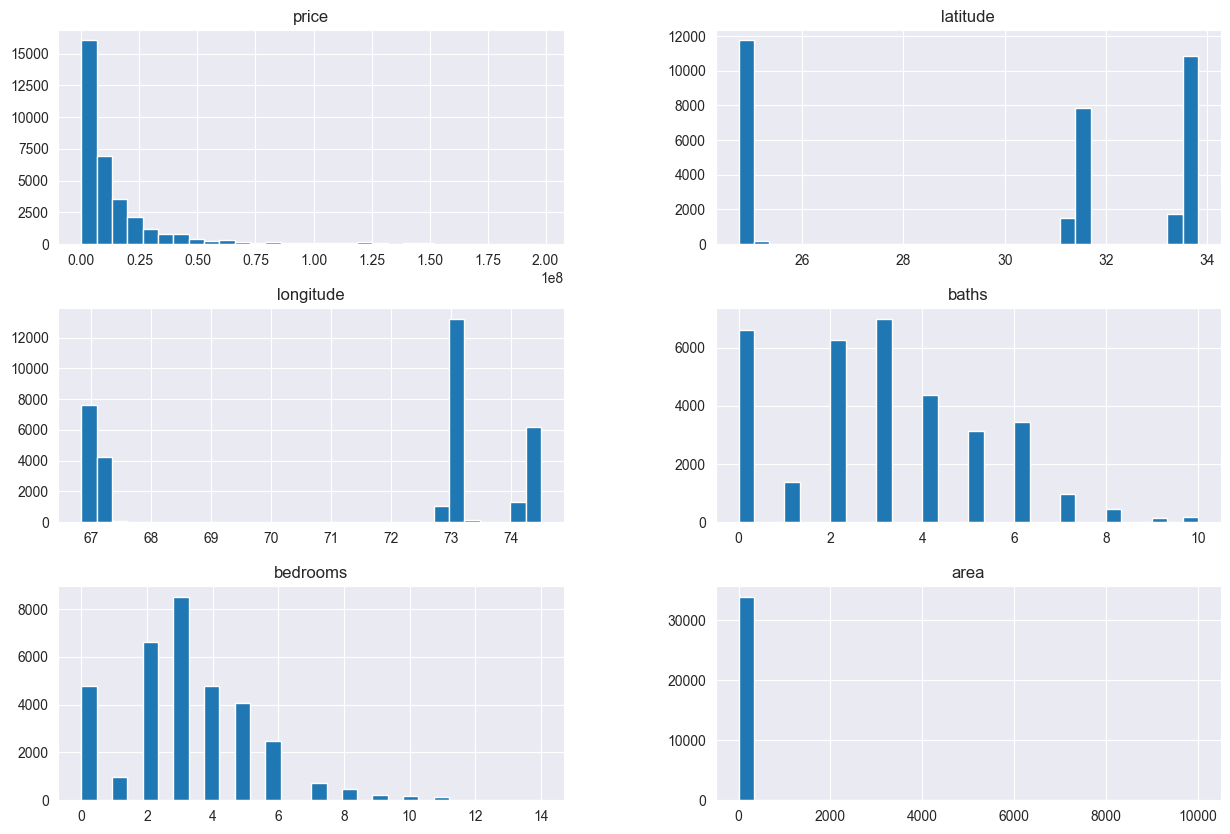

In [43]:
df[numerical_features].hist(figsize=(15, 10), bins=30)
plt.show()

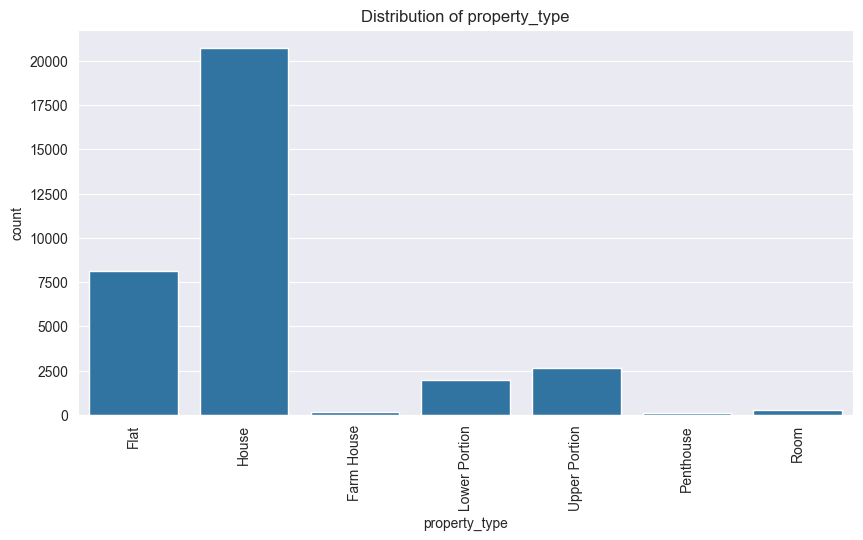

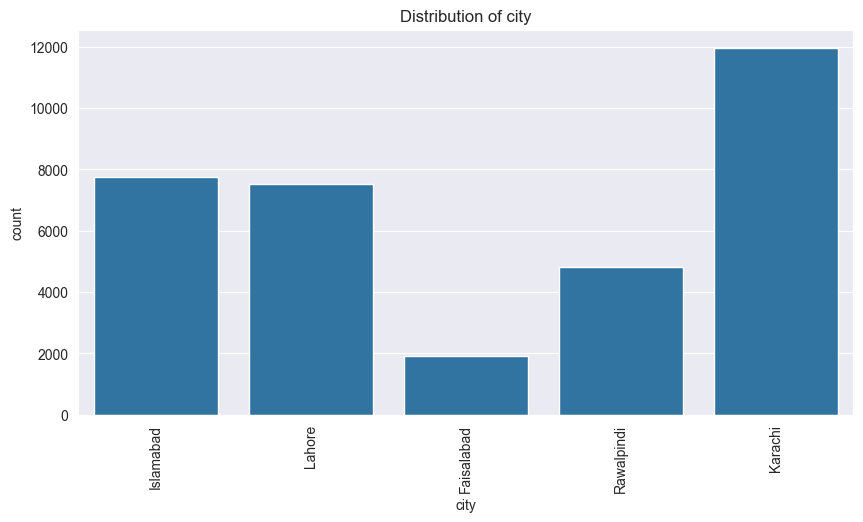

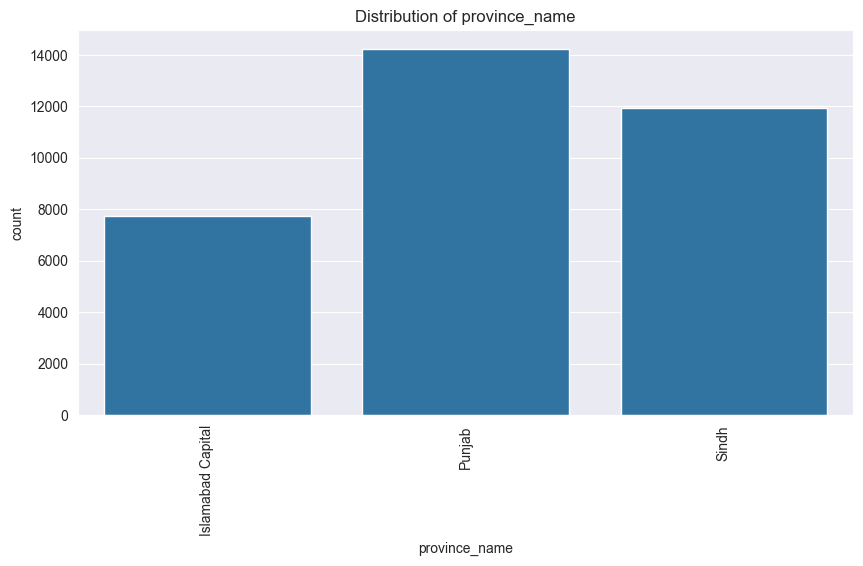

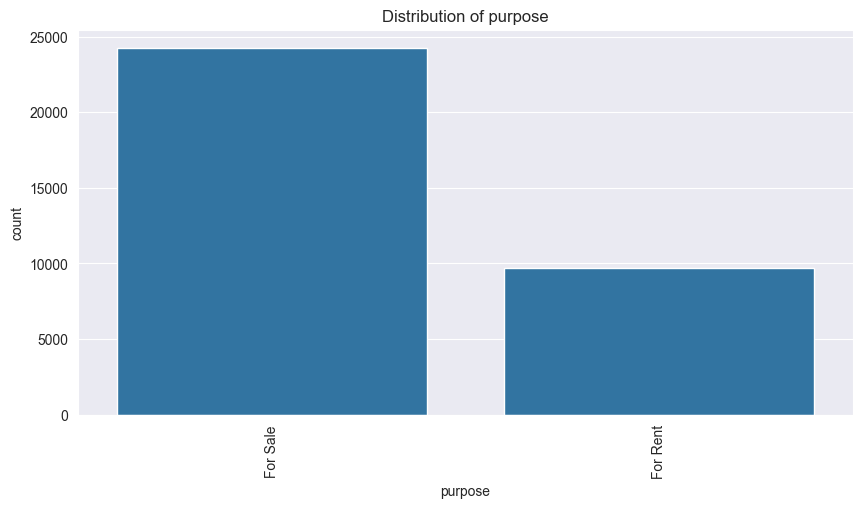

In [44]:
for feature in categorical_features:
    # too many unique values, will not be visualized
    if feature not in ['agency', 'agent', 'location']:
        plt.figure(figsize=(10, 5))
        sns.countplot(data=df, x=feature)
        plt.title(f'Distribution of {feature}')
        plt.xticks(rotation=90)
        plt.show()

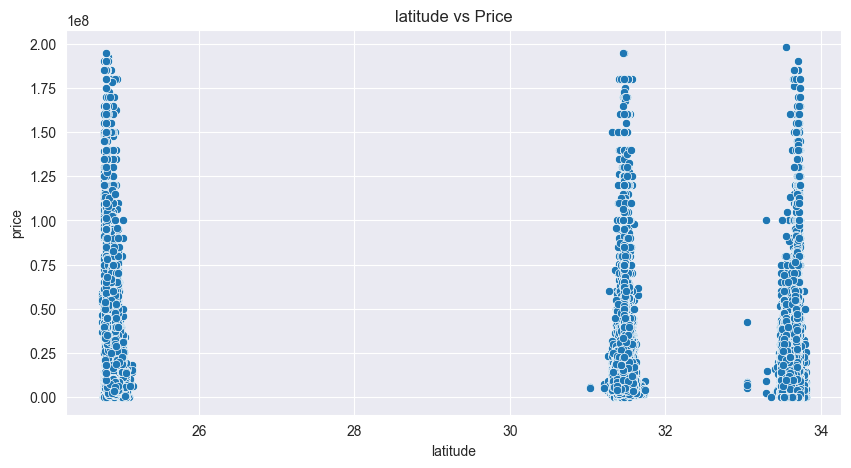

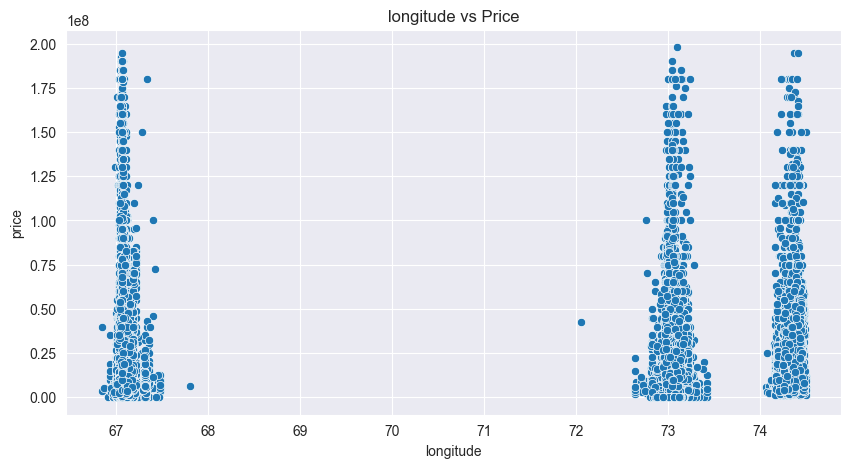

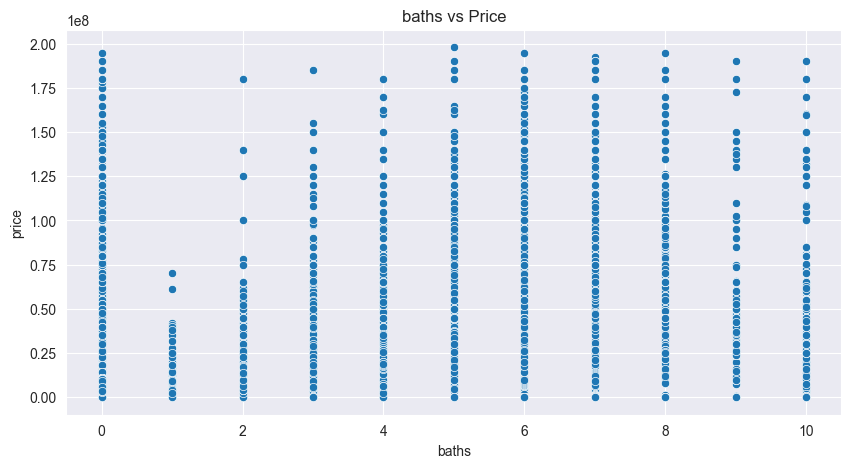

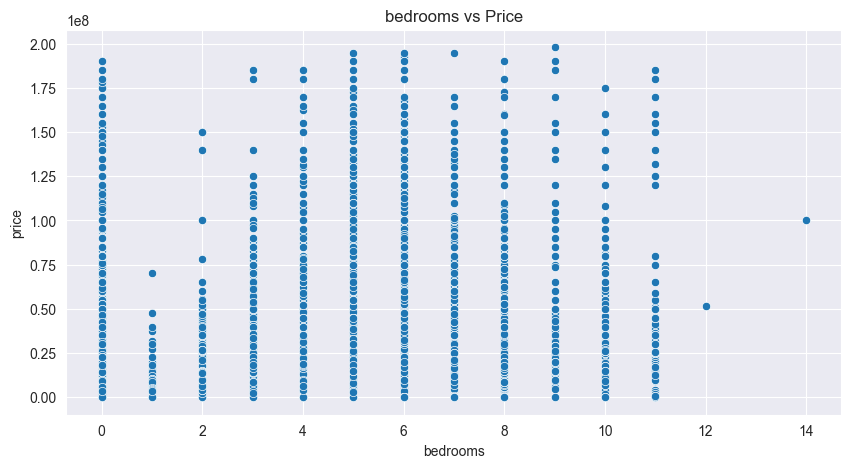

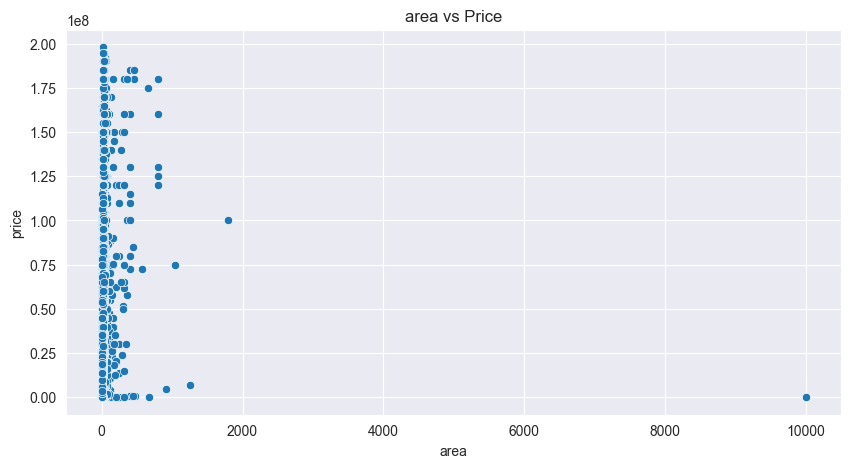

In [45]:
for feature in numerical_features:
    if feature != 'price':
        plt.figure(figsize=(10, 5))
        sns.scatterplot(data=df, x=feature, y='price')
        plt.title(f'{feature} vs Price')
        plt.show()

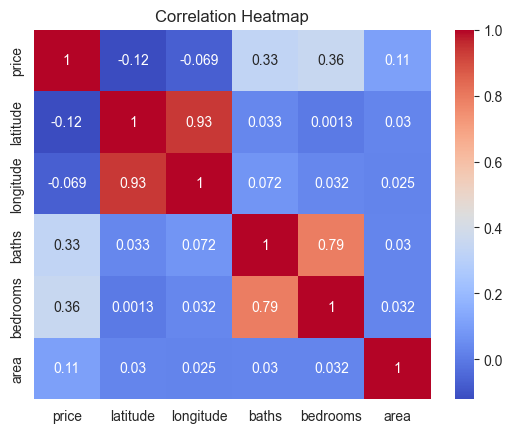

In [46]:
sns.heatmap(df[numerical_features].corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#### Conclusions on linear relationships between features and price:
- Price has a positive strong linear relationship with number of bedrooms and baths;
- Price has a positive weak linear relationship with area;
- Price has a negative weak linear relationship with latitude and longitude.
- Number of bedroom and baths are strongly correlated with each other.
- Latitude and longitude are strongly correlated with each other.
- No strong linear relationship between area and any other numerical feature.

#### Preliminary ML Methods:
- Linear Regression
- Random Forest
- Gradient Boosting
- K-Nearest Neighbors
- Lasso
- Ridge

#### Prelinimary set of features for ML:
- Numerical features: 'latitude', 'longitude', 'baths', 'bedrooms', 'area'
- Categorical features: 'property_type', 'location', 'city', 'province_name', 'purpose', 'agency', 'agent'

### Data transformation for ML-ready dataset

Since there are too much unique values of agency, agent, and location (2002, 2779, 1269, respectively), we need to conduct PCA

In [47]:
pca = PCA(n_components=500).fit(pd.get_dummies(df['agency']))
agency_pca = pca.transform(pd.get_dummies(df['agency']))
print(pca.n_components_, pca.explained_variance_ratio_.sum())

pca = PCA(n_components=500).fit(pd.get_dummies(df['agent']))
agent_pca = pca.transform(pd.get_dummies(df['agent']))
print(pca.n_components_, pca.explained_variance_ratio_.sum())

pca = PCA(n_components=500).fit(pd.get_dummies(df['location']))
location_pca = pca.transform(pd.get_dummies(df['location']))
print(pca.n_components_, pca.explained_variance_ratio_.sum())

500 0.8089099551760998
500 0.7510887714361396
500 0.941697259209718


In [48]:
df = df.reset_index(drop=True)

In [49]:
df = df.drop(['agency', 'agent', 'location'], axis=1)
df = df.join(pd.DataFrame(agency_pca), rsuffix='_agency')
df = df.join(pd.DataFrame(agent_pca), rsuffix='_agent')
df = df.join(pd.DataFrame(location_pca), rsuffix='_location')
df

,location_id,property_type,price,city,province_name,latitude,longitude,baths,area,purpose,...,490,491,492,493,494,495,496,497,498,499
0,3325,Flat,10000000,Islamabad,Islamabad Capital,33.679890,73.012640,2,4.0,For Sale,...,0.000146,6.661961e-06,-0.000049,-2.691533e-05,-4.072365e-05,-0.000047,3.421885e-05,3.762708e-05,3.771549e-05,-3.618835e-05
1,340,House,43500000,Islamabad,Islamabad Capital,33.707573,73.151199,4,40.0,For Sale,...,0.000019,9.968650e-07,-0.000006,-3.616753e-06,-5.382995e-06,-0.000006,4.557422e-06,4.941113e-06,5.088446e-06,-4.789816e-06
2,3390,House,34500000,Islamabad,Islamabad Capital,33.623947,73.126588,8,32.0,For Sale,...,0.000033,1.655608e-06,-0.000011,-6.067674e-06,-9.046770e-06,-0.000010,7.653188e-06,8.310133e-06,8.534391e-06,-8.048073e-06
3,445,House,27000000,Islamabad,Islamabad Capital,33.579034,73.139591,8,20.0,For Sale,...,0.000192,8.253873e-06,-0.000065,-3.510968e-05,-5.348824e-05,-0.000062,4.467783e-05,4.948766e-05,4.902409e-05,-4.736851e-05
4,376,House,50000000,Islamabad,Islamabad Capital,33.540894,73.095732,7,20.0,For Sale,...,0.000003,1.814401e-07,-0.000001,-6.504676e-07,-9.660517e-07,-0.000001,8.186776e-07,8.859715e-07,9.154238e-07,-8.598340e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33940,6699,House,19000000,Karachi,Sindh,24.929408,67.080710,4,4.8,For Sale,...,0.000036,1.801337e-06,-0.000012,-6.616663e-06,-9.869300e-06,-0.000011,8.347496e-06,9.067106e-06,9.306111e-06,-8.779332e-06
33941,9700,Flat,6000000,Karachi,Sindh,24.927051,67.173994,0,3.8,For Sale,...,0.003491,6.261027e-03,-0.010328,-5.926385e-03,8.544018e-04,-0.002857,6.021867e-03,1.954221e-03,4.265566e-04,-7.713845e-03
33942,1483,Flat,9500000,Karachi,Sindh,24.805045,67.064323,2,4.2,For Sale,...,0.000003,1.814401e-07,-0.000001,-6.504676e-07,-9.660517e-07,-0.000001,8.186776e-07,8.859715e-07,9.154238e-07,-8.598340e-07
33943,6844,Flat,3500000,Karachi,Sindh,24.907871,67.115263,0,6.0,For Sale,...,0.000009,4.643046e-07,-0.000003,-1.671354e-06,-2.484067e-06,-0.000003,2.104421e-06,2.278842e-06,2.351911e-06,-2.210733e-06


In [50]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['year'] = df['date_added'].dt.year
df['month'] = df['date_added'].dt.month
df = df.drop('date_added', axis=1)
df

,location_id,property_type,price,city,province_name,latitude,longitude,baths,area,purpose,...,492,493,494,495,496,497,498,499,year,month
0,3325,Flat,10000000,Islamabad,Islamabad Capital,33.679890,73.012640,2,4.0,For Sale,...,-0.000049,-2.691533e-05,-4.072365e-05,-0.000047,3.421885e-05,3.762708e-05,3.771549e-05,-3.618835e-05,2019,2
1,340,House,43500000,Islamabad,Islamabad Capital,33.707573,73.151199,4,40.0,For Sale,...,-0.000006,-3.616753e-06,-5.382995e-06,-0.000006,4.557422e-06,4.941113e-06,5.088446e-06,-4.789816e-06,2019,4
2,3390,House,34500000,Islamabad,Islamabad Capital,33.623947,73.126588,8,32.0,For Sale,...,-0.000011,-6.067674e-06,-9.046770e-06,-0.000010,7.653188e-06,8.310133e-06,8.534391e-06,-8.048073e-06,2019,4
3,445,House,27000000,Islamabad,Islamabad Capital,33.579034,73.139591,8,20.0,For Sale,...,-0.000065,-3.510968e-05,-5.348824e-05,-0.000062,4.467783e-05,4.948766e-05,4.902409e-05,-4.736851e-05,2019,1
4,376,House,50000000,Islamabad,Islamabad Capital,33.540894,73.095732,7,20.0,For Sale,...,-0.000001,-6.504676e-07,-9.660517e-07,-0.000001,8.186776e-07,8.859715e-07,9.154238e-07,-8.598340e-07,2018,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33940,6699,House,19000000,Karachi,Sindh,24.929408,67.080710,4,4.8,For Sale,...,-0.000012,-6.616663e-06,-9.869300e-06,-0.000011,8.347496e-06,9.067106e-06,9.306111e-06,-8.779332e-06,2019,4
33941,9700,Flat,6000000,Karachi,Sindh,24.927051,67.173994,0,3.8,For Sale,...,-0.010328,-5.926385e-03,8.544018e-04,-0.002857,6.021867e-03,1.954221e-03,4.265566e-04,-7.713845e-03,2019,4
33942,1483,Flat,9500000,Karachi,Sindh,24.805045,67.064323,2,4.2,For Sale,...,-0.000001,-6.504676e-07,-9.660517e-07,-0.000001,8.186776e-07,8.859715e-07,9.154238e-07,-8.598340e-07,2019,4
33943,6844,Flat,3500000,Karachi,Sindh,24.907871,67.115263,0,6.0,For Sale,...,-0.000003,-1.671354e-06,-2.484067e-06,-0.000003,2.104421e-06,2.278842e-06,2.351911e-06,-2.210733e-06,2019,4


In [51]:
df.isna().sum()

location_id      0
property_type    0
price            0
city             0
province_name    0
                ..
497              0
498              0
499              0
year             0
month            0
Length: 1513, dtype: int64

In [52]:
def one_hot_encode_feature(X_train, X_test, column_name):
    ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(X_train[[column_name]])

    train_encoded_df = pd.DataFrame(ohe.transform(X_train[[column_name]]), columns=ohe.get_feature_names_out([column_name]))
    test_encoded_df = pd.DataFrame(ohe.transform(X_test[[column_name]]), columns=ohe.get_feature_names_out([column_name]))

    X_train = X_train.drop(column_name, axis=1)
    X_test = X_test.drop(column_name, axis=1)

    X_train = X_train.reset_index(drop=True)
    train_encoded_df = train_encoded_df.reset_index(drop=True)

    X_test = X_test.reset_index(drop=True)
    test_encoded_df = test_encoded_df.reset_index(drop=True)

    X_train = pd.concat([X_train, train_encoded_df], axis=1)
    X_test = pd.concat([X_test, test_encoded_df], axis=1)

    return X_train, X_test

def scale_feature(X_train, X_test, column_name, strategy='std'):
    scalers = {
        'std': StandardScaler,
        'minmax': MinMaxScaler
    }
    if strategy not in scalers:
        raise NotImplementedError(f'Scaling is not implemented for {strategy}')

    scaler = scalers[strategy]().fit(X_train[[column_name]])

    X_train[column_name] = scaler.transform(X_train[[column_name]])
    X_test[column_name] = scaler.transform(X_test[[column_name]])
    return X_train, X_test

In [53]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['price'], axis=1), df['price'], random_state=42)

X_train, X_test = one_hot_encode_feature(X_train, X_test, 'property_type')
X_train, X_test = one_hot_encode_feature(X_train, X_test, 'city')
X_train, X_test = one_hot_encode_feature(X_train, X_test, 'province_name')
X_train, X_test = one_hot_encode_feature(X_train, X_test, 'purpose')

X_train, X_test = scale_feature(X_train, X_test, 'latitude', strategy='minmax')
X_train, X_test = scale_feature(X_train, X_test, 'longitude', strategy='minmax')
X_train, X_test = scale_feature(X_train, X_test, 'area')
X_train, X_test = scale_feature(X_train, X_test, 'location_id', strategy='minmax')
X_train, X_test = scale_feature(X_train, X_test, 'baths')
X_train, X_test = scale_feature(X_train, X_test, 'bedrooms')
X_train, X_test = scale_feature(X_train, X_test, 'month', strategy='minmax')
X_train, X_test = scale_feature(X_train, X_test, 'year', strategy='minmax')

In [54]:
X_train

,location_id,latitude,longitude,baths,area,bedrooms,0,1,2,3,...,city_Faisalabad,city_Islamabad,city_Karachi,city_Lahore,city_Rawalpindi,province_name_Islamabad Capital,province_name_Punjab,province_name_Sindh,purpose_For Rent,purpose_For Sale
0,0.112362,0.743831,0.977947,1.376910,1.237152,1.367379,0.333898,0.000026,0.000012,0.000008,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.499274,0.018342,0.031541,0.455495,-0.133371,0.394836,-0.666878,-0.007693,-0.004908,-0.003570,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.514018,0.017290,0.023754,-0.926627,-0.345823,-1.063980,0.333898,0.000026,0.000012,0.000008,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.246441,0.978558,0.821660,0.455495,-0.220851,-0.091436,0.333898,0.000026,0.000012,0.000008,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.436302,0.982382,0.815698,-0.465919,-0.345823,0.394836,0.333898,0.000026,0.000012,0.000008,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25453,0.770555,0.965628,0.818164,-1.387334,-0.220851,-0.577708,0.333898,0.000026,0.000012,0.000008,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
25454,0.011766,0.985728,0.802721,-0.005212,0.087412,-0.091436,0.333898,0.000026,0.000012,0.000008,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
25455,0.745134,0.028688,0.037459,1.376910,-0.179194,0.394836,0.333898,0.000026,0.000012,0.000008,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
25456,0.107350,0.009369,0.027855,-0.926627,0.404007,-1.063980,-0.671329,-0.022258,-0.047788,-0.102287,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


## Data Quality Verification

### Missing values

In [56]:
X_train.isna().sum().any()

False

In [57]:
X_test.isna().sum().any()

False

In [59]:
y_train.isna().sum().any()

False

In [60]:
y_test.isna().sum().any()

False

Of course, we fixed missing values in agent and agency columns by filling them with '-'. So, there are no missing values in the dataset. But it's not about dataset quality, because it's a logical missing value.
This is also about how we handle missing values in the dataset.

Overall, the quality of data is good.